# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
import os
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/chiraggarg95/Assignment-Datasets/main/crx.csv', names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


# Identifying Null Values 

In [3]:
for col in df.columns:
    print(col, end=' ')
    print(dict(df[col].value_counts()))

A1 {'b': 468, 'a': 210, '?': 12}
A2 {'?': 12, '22.67': 9, '20.42': 7, '19.17': 6, '20.67': 6, '23.58': 6, '24.50': 6, '25.00': 6, '22.50': 6, '18.83': 6, '33.17': 5, '23.25': 5, '23.00': 5, '27.83': 5, '27.67': 5, '23.08': 5, '41.17': 4, '32.33': 4, '24.58': 4, '24.75': 4, '23.50': 4, '34.17': 4, '27.25': 4, '22.08': 4, '29.50': 4, '20.00': 4, '26.67': 4, '28.58': 4, '20.75': 4, '35.17': 4, '25.17': 4, '26.17': 4, '22.92': 4, '25.67': 4, '28.25': 3, '25.25': 3, '29.83': 3, '33.58': 3, '17.08': 3, '23.75': 3, '20.17': 3, '28.17': 3, '23.42': 3, '22.17': 3, '18.08': 3, '23.92': 3, '19.50': 3, '21.08': 3, '20.08': 3, '19.67': 3, '29.58': 3, '40.58': 3, '21.17': 3, '39.92': 3, '22.75': 3, '39.17': 3, '24.08': 3, '34.08': 3, '34.83': 3, '28.67': 3, '36.67': 3, '26.75': 3, '23.17': 3, '40.92': 3, '21.83': 3, '37.50': 3, '34.00': 3, '30.17': 3, '20.83': 3, '21.92': 3, '25.75': 3, '36.17': 3, '22.25': 3, '18.58': 3, '19.42': 3, '33.67': 3, '21.50': 3, '19.58': 3, '22.58': 3, '17.92': 3, '37.33

# Replacing Null Values

In [4]:
df['A1'] = df['A1'].replace({'?': None})
df['A2'] = df['A2'].replace({'?': None})
df['A4'] = df['A4'].replace({'?': None})
df['A5'] = df['A5'].replace({'?': None})
df['A6'] = df['A6'].replace({'?': None})
df['A7'] = df['A7'].replace({'?': None})
df['A14'] = df['A14'].replace({'?': None})

In [5]:
df.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [6]:
dict(df['A1'].value_counts())

{'a': 210, 'b': 468}

# Null Value Treatment

In [7]:
df_nt = df.dropna()
df_nt.shape

(653, 16)

# Preparing and Analysing dataset for prediction

In [8]:
    df_nt['A16'] = df_nt['A16'].replace({'-': 0, '+': 1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


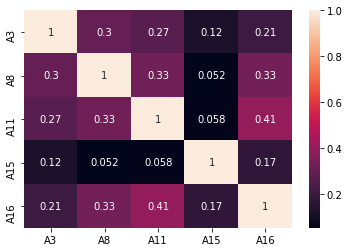

In [9]:
df_nt_corr = df_nt.corr()
sns.heatmap(df_nt_corr, annot=True)

In [10]:
df_nt['A2'] = df_nt['A2'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_nt['A2'].describe()
df_nt.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16      int64
dtype: object

In [12]:
cont = []
for columns in df.columns:
  print(f"{columns}: {len(pd.unique(df_nt[columns]))}")
  if df_nt[columns].dtype == "object":
    cont.append(columns)
cont

A1: 2
A2: 340
A3: 213
A4: 3
A5: 3
A6: 14
A7: 9
A8: 131
A9: 2
A10: 2
A11: 23
A12: 2
A13: 3
A14: 164
A15: 229
A16: 2


['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A14']

In [13]:
df["A2"].dtype

dtype('O')

# Details of prediction

Variable to be predicted: A16 :: Discrete variable with two values '-' and '+' (mapped to 0 and 1 resp. for prediction purposes). Supervised Learning Problem

Accuracy will be used as a measure of performance

All variables will be relevant for predicting since none of them are much correlated to each other

# Normalising continuous Variables

In [14]:
# a = list(('A2', 'A3', 'A8', 'A14', 'A15'))
# df_nt.iloc[:, [1, 2, 7, 13, 14]] = StandardScaler.fit_transform(df_nt.iloc[:, [1, 2, 7, 13, 14]])
# df_nt

scaler = StandardScaler()

df_nt.loc[:, ['A2', 'A3', 'A8', 'A14', 'A15']] = scaler.fit_transform(df_nt.loc[:, ['A2', 'A3', 'A8', 'A14', 'A15']])
df_nt

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,-0.056962,-0.961440,u,g,w,v,-0.295171,t,t,1,f,g,0.128682,-0.193125,1
1,a,2.296536,-0.073565,u,g,q,h,0.236217,t,t,6,f,g,-0.816802,-0.086443,1
2,a,-0.592078,-0.861903,u,g,q,h,-0.220955,t,f,0,f,g,0.592504,-0.036150,1
3,b,-0.310572,-0.654865,u,g,w,v,0.446990,t,t,5,t,g,-0.477855,-0.192553,1
4,b,-0.958122,0.158358,u,g,w,v,-0.158613,t,f,0,f,s,-0.358926,-0.193125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,-0.881193,1.046233,y,p,e,h,-0.295171,f,f,0,f,g,0.473575,-0.193125,0
686,a,-0.746780,-0.812134,u,g,c,v,-0.072523,f,t,2,t,g,0.116789,-0.118066,0
687,a,-0.528676,1.726075,y,p,ff,ff,-0.072523,f,t,1,t,g,0.116789,-0.192934,0
688,b,-1.148329,-0.920630,u,g,aa,v,-0.654378,f,f,0,f,g,0.592504,-0.050247,0


# One hot Encoding 

In [15]:
df_nt_ohe = pd.get_dummies(df_nt)
df_nt_ohe.shape

(653, 47)

In [16]:
df_nt_ohe

,A2,A3,A8,A11,A14,A15,A16,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,A6_cc,A6_d,A6_e,A6_ff,A6_i,A6_j,A6_k,A6_m,A6_q,A6_r,A6_w,A6_x,A7_bb,A7_dd,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,-0.056962,-0.961440,-0.295171,1,0.128682,-0.193125,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0
1,2.296536,-0.073565,0.236217,6,-0.816802,-0.086443,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0
2,-0.592078,-0.861903,-0.220955,0,0.592504,-0.036150,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0
3,-0.310572,-0.654865,0.446990,5,-0.477855,-0.192553,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0
4,-0.958122,0.158358,-0.158613,0,-0.358926,-0.193125,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,-0.881193,1.046233,-0.295171,0,0.473575,-0.193125,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0
686,-0.746780,-0.812134,-0.072523,2,0.116789,-0.118066,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0
687,-0.528676,1.726075,-0.072523,1,0.116789,-0.192934,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0
688,-1.148329,-0.920630,-0.654378,0,0.592504,-0.050247,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0


In [17]:
Y = df_nt_ohe['A16']
X = df_nt_ohe.drop(columns='A16')

In [18]:
print(X.shape)
print(Y.shape)

(653, 46)
(653,)


# Ridge Classifier Model

In [19]:
def rdg_class(X,Y):
  

  cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=265)
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
  grid = RandomizedSearchCV(estimator=RidgeClassifier(), 
              param_distributions={
            'alpha': (0.005,0.01,0.02, 0.1 ,0.2,0.25,0.3,0.4,0.5, 1, 2, 5,10,20,21,22,23,50),
            "max_iter": np.arange(1000,2001,50),
            "fit_intercept":(True, False)
        }, scoring='accuracy', cv = cv,n_iter = 500, verbose=0,n_jobs=-1)
  grid_result = grid.fit(x_train, y_train)
  best_params = grid_result.best_params_
  
  # Print the best score and params
  print('Best Score Achieved: ', grid_result.best_score_)
  print('Best set of parameters: ', grid_result.best_params_)

  # Train the model
  rdg = RidgeClassifier(alpha=best_params["alpha"], fit_intercept= best_params["fit_intercept"],max_iter = best_params["max_iter"])
  rdg.fit(x_train,y_train)

  #Make predictions
  pred = rdg.predict(x_test)
  scr = metrics.accuracy_score(y_test, pred)

  return scr


In [20]:
rdg_class(X,Y)

Best Score Achieved:  0.8684684684684685
Best set of parameters:  {'max_iter': 1650, 'fit_intercept': False, 'alpha': 21}


0.8571428571428571

# Random Forest Classifier

In [21]:
def rfr_class(X, Y):
# Perform RandomizedSearch
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
    cv = RepeatedKFold(n_splits=5, n_repeats=1)
    gsc = RandomizedSearchCV(
        estimator=RandomForestClassifier(),
        param_distributions={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 500,1000),
            'min_samples_leaf': (1, 2, 4),
        },
        cv=cv, scoring='accuracy', n_iter = 15, verbose=0,n_jobs=-1)
    
    # Chose the best parameters
    grid_result = gsc.fit(x_train, y_train)
    print(grid_result)
    best_params = grid_result.best_params_
    
    rfc = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],min_samples_leaf = best_params["min_samples_leaf"], random_state=False, verbose=False)
    # Train the model
    rfc.fit(x_train, y_train)

    #Make predictions on Test Set
    pred = rfc.predict(x_test)
    scr = metrics.accuracy_score(y_test, pred)


    return scr

In [22]:
rfr_class(X,Y)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=None),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                      

0.8775510204081632

# Conclusion

#### From the above models we see that good scores are obtained in both Random Forest and Ridge Classifier. Hence both of these models can be used for prediction purposes.